In [4]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import generate_diro2c_explanation, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import print_rules
from tasks.running_example import make_task

In [5]:
clf_a, clf_b, X, y, feature_names = make_task()

In [6]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# Global explanations

## $(0,1)$

In [70]:
focus_class = '(0, 1)'

In [90]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global', focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 1min 32s, sys: 711 ms, total: 1min 33s
Wall time: 1min 38s


In [91]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [92]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [93]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_explain, y_explain)
    feature_importances = tree.feature_importances_
    feature_order = np.flip(np.argsort(feature_importances))
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_title('Relative feature importance')
    ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
    plt.show()
    
    fig, ax = plt.subplots(figsize=(14, 14))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True)
    
    print_rules(tree, feature_names, class_names, focus_class, feature_order, X_test=X)

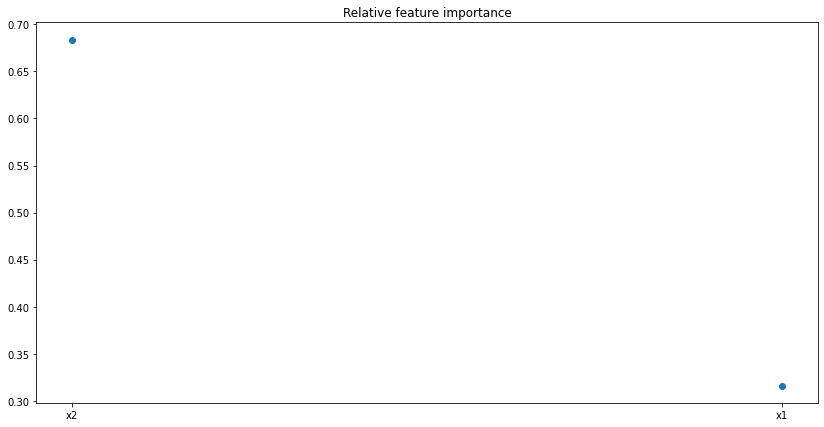

node #11: if (x2 > 97.0) and (x1 > -205.0) and (x1 <= -7.0) then class (0, 1) (covers 1.0 of 1000 instances)
coverage (X_train): 0.9606147934678194
coverage (X_test): 1.0


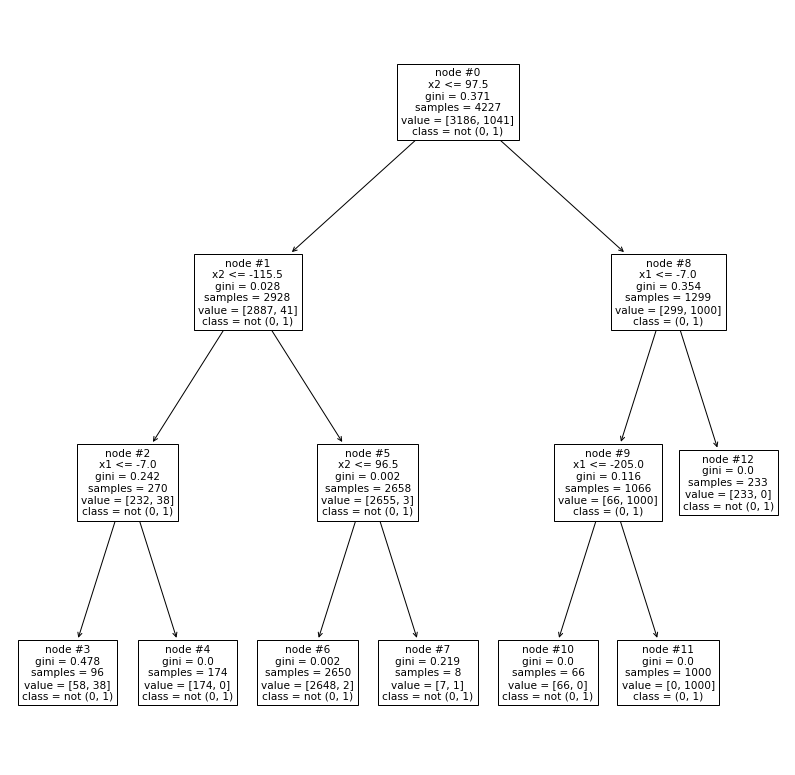

In [94]:
explain(max_depth=3)

Starting with max_depth=3, it yields one rule, that covers 96% of generated instances classified $(0,1)$ and 100% of the data set instances classified $(0,1)$.

It is reasonable to stop at this point. But if we wanted to check for further differences, we could increase the max_depth:

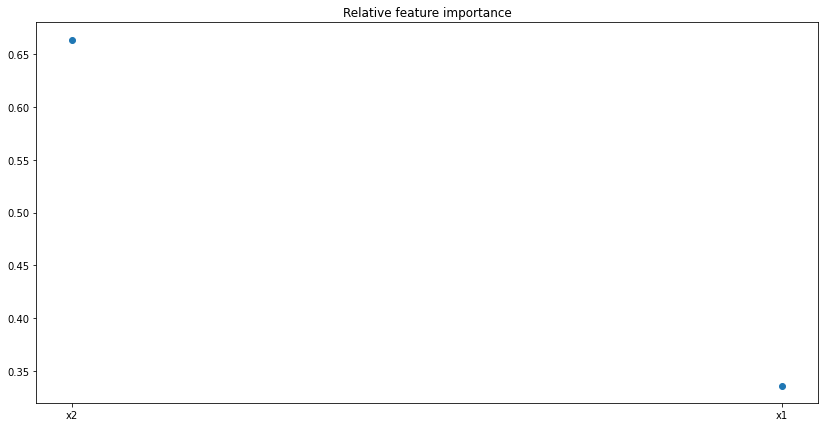

node #17: if (x2 > 97.0) and (x1 > -205.0) and (x1 <= -7.0) then class (0, 1) (covers 1.0 of 1000 instances)
node #5: if (x2 <= -116.0) and (x1 > -17.0) and (x1 <= -7.0) then class (0, 1) (covers 1.0 of 38 instances)
coverage (X_train): 0.9971181556195965
coverage (X_test): 1.0


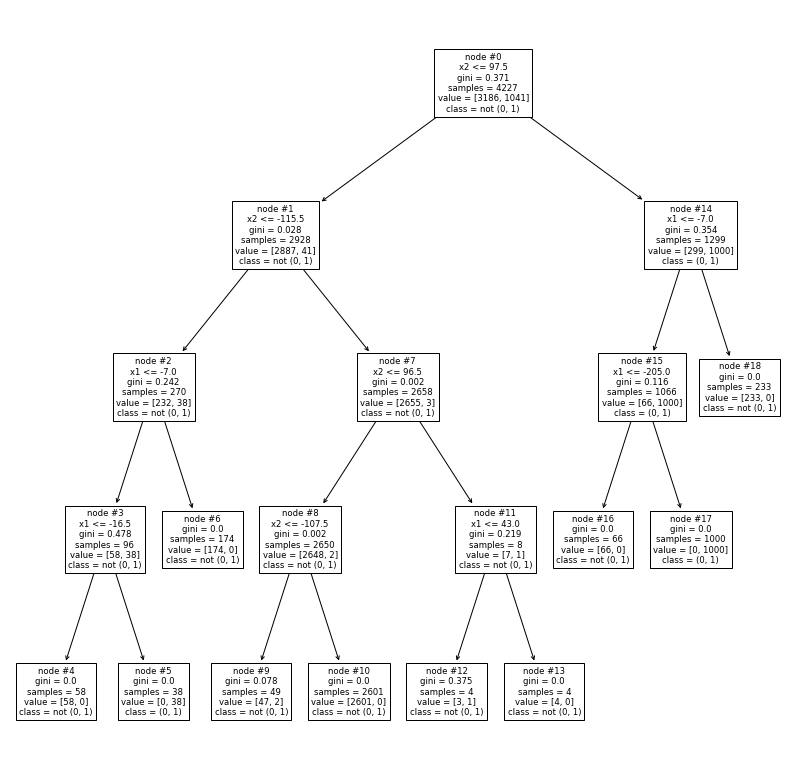

In [95]:
explain(max_depth=4)

Now we have two rules, and an addtional 2.7% coverage on generated instances classified $(0,1)$. Note, that this rule set now covers also the difference #3, which is not present in the data set.

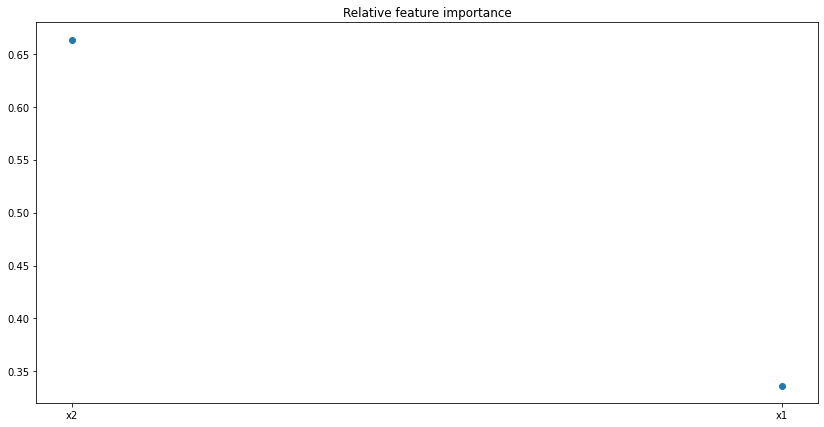

node #21: if (x2 > 97.0) and (x1 > -205.0) and (x1 <= -7.0) then class (0, 1) (covers 1.0 of 1000 instances)
node #5: if (x2 <= -116.0) and (x1 > -17.0) and (x1 <= -7.0) then class (0, 1) (covers 1.0 of 38 instances)
node #16: if (x2 > 96.0) and (x2 <= 97.0) and (x1 > -86.0) and (x1 <= 43.0) then class (0, 1) (covers 1.0 of 1 instances)
coverage (X_train): 0.9980787704130644
coverage (X_test): 1.0


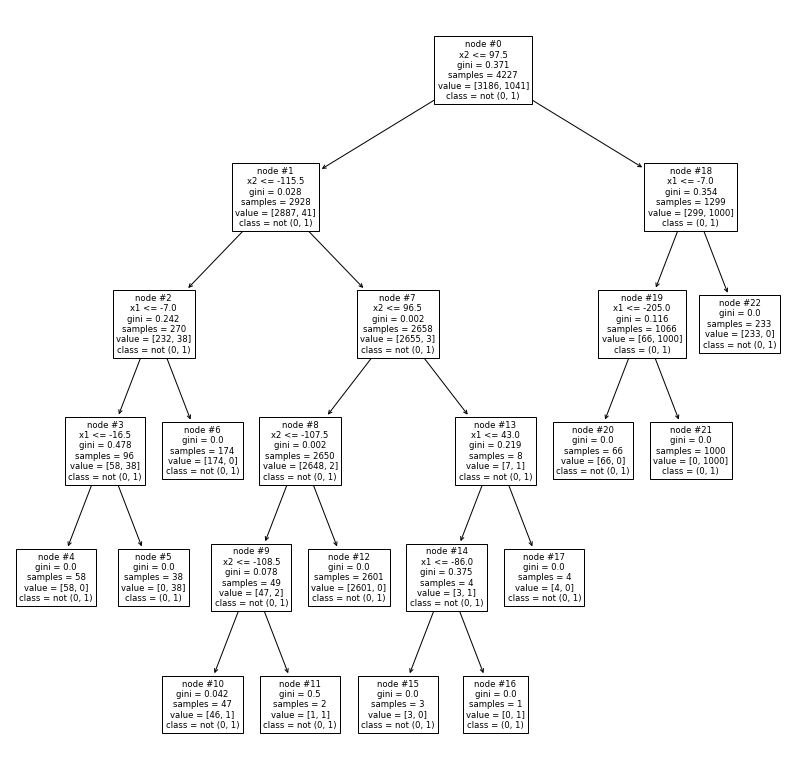

In [96]:
explain(max_depth=5)

Adding another layer only increases the coverage by 0.1% and adds a rule that is based on just a single instance.

Sticking to the explanation for max_depth=4, we get:

predictability: all areas with differences are covered.

fidelity:
- difference #1: x1 lower bound differs by 1, upper bound by 1
- difference #3: x2 upper bound differs by 7, x1 upper bound by 2

selectiveness: best possible (minimal set of rules to describe the differences detected)

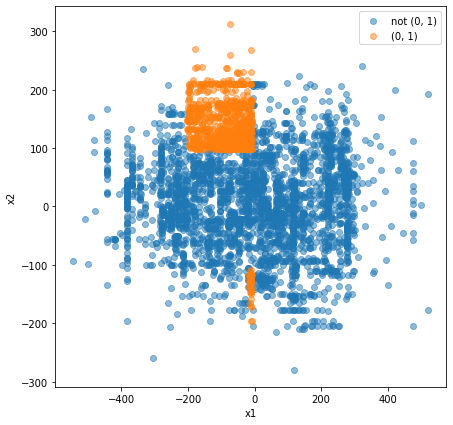

In [97]:
plot_diro2c_2d(explanation, 'x1', 'x2')

## $(1,0)$

In [98]:
focus_class = '(1, 0)'

In [91]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global', focus_class=focus_class, gn_population_size=500)
with open(f'diro2c.{focus_class}.pickle', 'wb') as f:
    pickle.dump(explanation, f, pickle.HIGHEST_PROTOCOL)

CPU times: user 1min 29s, sys: 616 ms, total: 1min 30s
Wall time: 1min 34s


In [99]:
with open(f'diro2c.{focus_class}.pickle', 'rb') as f:
    explanation = pickle.load(f)

In [100]:
evaluation_info = explanation['binary_diff_classifer']['evaluation_info']
X_explain, y_explain = evaluation_info['X'], evaluation_info['y']
feature_names = comparer.feature_names
class_names = explanation['class_names']

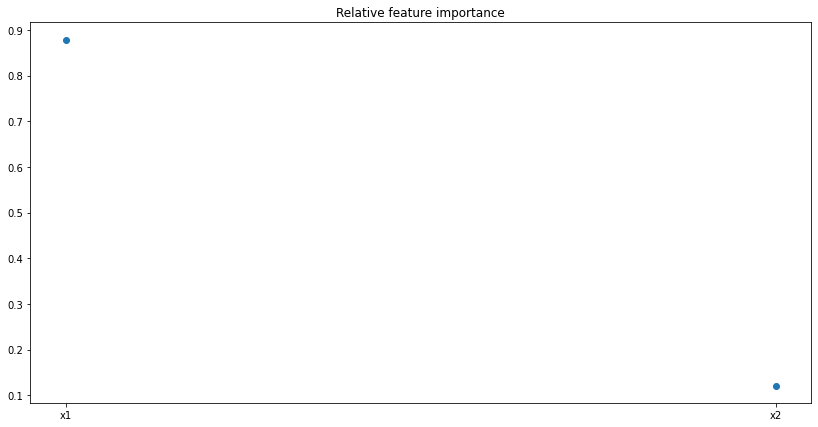

node #5: if (x1 > -9.0) and (x1 <= 150.0) and (x2 > -108.0) then class (1, 0) (covers 0.947 of 2490 instances)
coverage (X_train): 1.0
coverage (X_test): 1.0


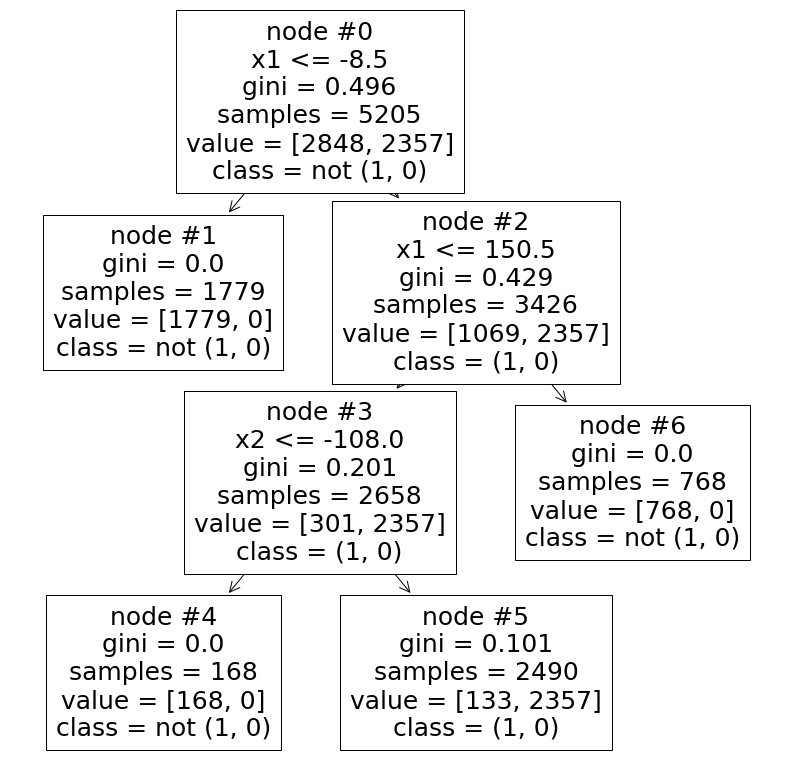

In [101]:
explain(max_depth=3)

All instances of generated and data set explained by just one rule. But it includes some instances, that are not $(1,0)$.

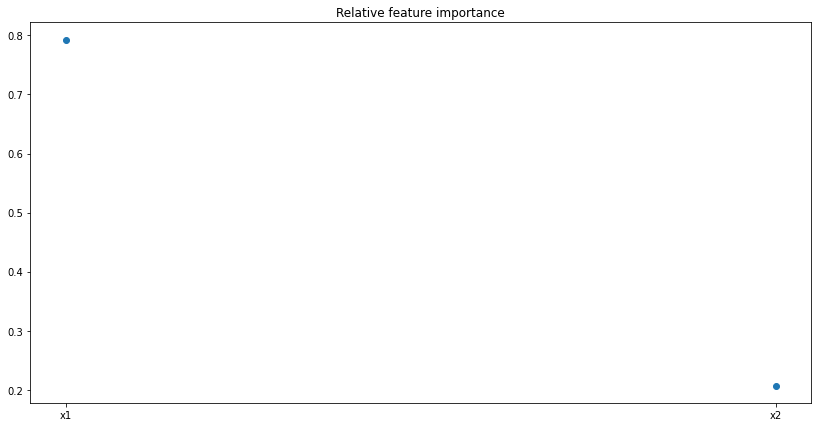

node #6: if (x1 > -9.0) and (x1 <= 150.0) and (x2 > -108.0) and (x2 <= 97.0) then class (1, 0) (covers 1.0 of 2357 instances)
coverage (X_train): 1.0
coverage (X_test): 1.0


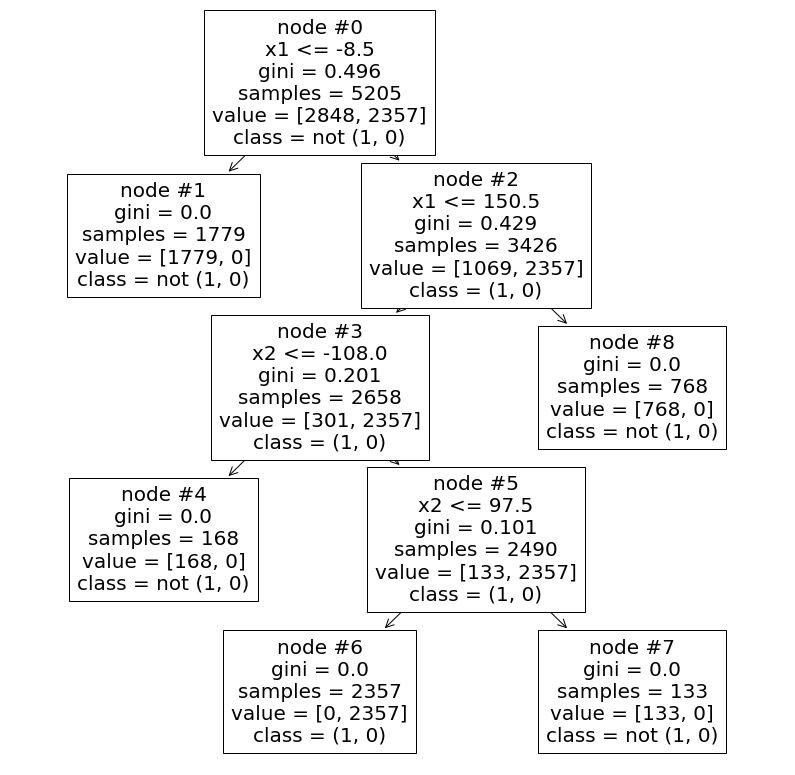

In [103]:
explain(max_depth=4)

With a more complex tree, now all $(1,0)$ instances are represented in one rule.

predictability: all areas with differences are covered.

fidelity:
- difference #2: x2 lower bound differs by 1

selectiveness: best possible (minimal set of rules to describe the differences detected)

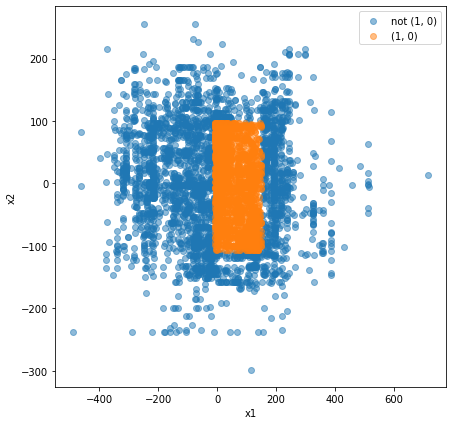

In [104]:
plot_diro2c_2d(explanation, 'x1', 'x2')